### Step 1: Import Libraries

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Reading and Understanding the Data

In [3]:
# Read the dataset
lead = pd.read_csv("Leads.csv")

In [4]:
# Check the first 5 rows(head) of the dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Check the shape of dataset
lead.shape

(9240, 37)

#### Inference:
The dataset contains 9240 rows and 37 columns

In [6]:
# Chek the information of dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Inference:
There are columns of following data types: float(4), integer(3), object(30).

There are many columns having missing values. Hence, we need to clean the data set

In [7]:
# Checking the statistical information for columns of dataset
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Inference:
There are 5 numerical variables excluding the Target Variable (Converted which is a binary variable) & Lead Number is just a number assigned to each lead which is procured

Total Visit have a mean of 3.44 with 75% of data falling between 0 to 5 and a max of 251 Visits. There are some null/missing values in Total Visit variable(9103 vs 9240).

Total Time Spent on Website have a mean of 487.69 with 75% of data falling between 0 and 936 and a max of 2272.

Page Views Per Visit have a mean of 2.36 with 75% of data falling between 0 and 3 and a max of 55 Views Per Visit. There are some null/missing values in Total Visit variable(9103 vs 9240).

All these 3 numerical variables are to be evaluated for Outlier analysis.

In [8]:
# Creating a copy of dataset
lead_duplicate = lead.copy()
lead_duplicate.shape

(9240, 37)

In [9]:
# Checking for duplicate rows and dropping the duplicate row if any
lead_duplicate.drop_duplicates(inplace = True)
lead_duplicate.shape

(9240, 37)

#### Inference:
There are 0 duplicate values in the dataset because:

The shape after running the drop duplicate command is same as the original dataset.

### Step 3: Cleaning and imputing the Data

In [10]:
# Checking the column names.
lead.columns

#Walk through the data dictionary to understand the meaning of each of these attributes and possible values in them

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Inference:
After walkthrough of data dictionary it is clear that <b>Prospect ID</b> & <b>Lead Number</b> are just indicative of the ID number of the Contacted People and will not have any impact on whether the lead is valuable or not. So, these are irrelevant to the analysis and can be dropped.

In [11]:
# Dropping "Lead Number" and "Prospect ID" variables as these have no relevance

lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
# Checking null values percentage in each column
round(lead.isnull().sum().sort_values(ascending=False)/lead.shape[0]*100,2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

#### Inference:
We have five columns/parameters having null values more than 45%. 

These columns/variables are: <b>Lead Quality(51.59%), Asymmetrique Activity Index(45.65%), Asymmetrique Profile Score(45.65%), Asymmetrique Activity Score(45.65%), Asymmetrique Profile Index(45.65%)</b>

So, we can drop the columns/variables having missing/null values greater than 45%

In [13]:
# Dropping columns/variables having missing values more than 45%

cols=lead.columns

for i in cols:
    if((100*(lead[i].isnull().sum()/(lead.shape[0]))) >= 45):
        lead.drop(i, 1, inplace = True)

In [14]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [15]:
# Checking null value percentage in each column
round(lead.isnull().sum().sort_values(ascending=False)/lead.shape[0]*100,2)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Through Recommendations                           0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive Mo

### Inference:
There are 12 varaiables (Catgorical-10, Numerical-2) having missing/null values.
We will start with missing values treatment in Categorical and Numerical Varaibles

### 3.1 Categorical Attributes Analysis

In [16]:
# Defined a function to create countplot for analysis of categorical columns 
def cat_plot(column):
    plt.figure(figsize=(15,5))
    s1=sns.countplot(x = column, data = lead , hue=lead.Converted)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

#### 3.1.1 Tags Variable

In [17]:
# Starting with analysis of "Tags" variable having maximum null values (36.29%).
# Checking value percentages of "Tags" variable
round(lead['Tags'].value_counts(dropna=False)/len(lead['Tags'])*100,2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [18]:
# Replacing NaN values with "Not Available"
lead['Tags'] = lead['Tags'].replace(np.nan,'Not Available')

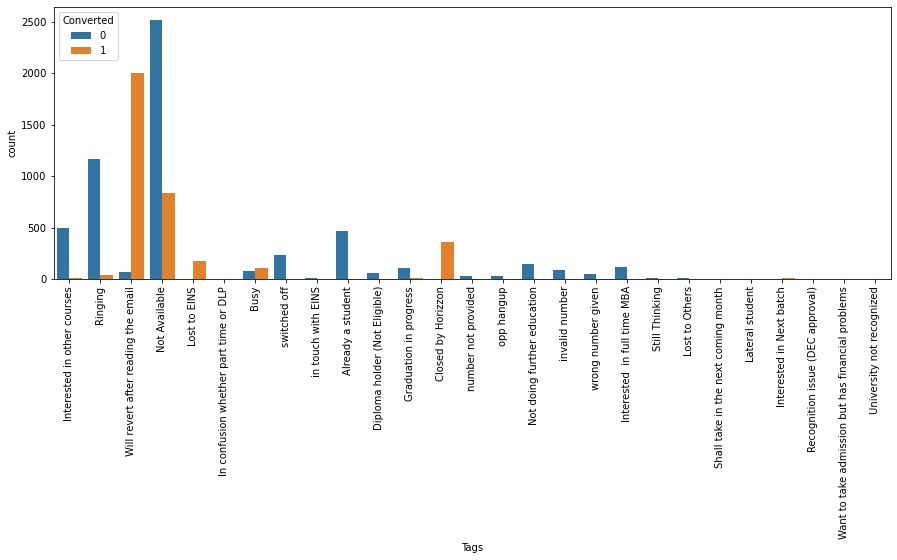

In [19]:
# Visualizing count of "Tags" Variable based on Target Variable ("Converted")
cat_plot('Tags')

### Inference:
There are many tags which are having low frequency/count. We can merge it into one tag category of <b>Others</b>

The tag of <b>"Will revert after reading the email"</b> has ~2000 converted leads out of 2072 leads.

The tag of <b>"Ringing"</b> has ~1100 unsuccessful leads out of 1203 leads.

In [20]:
# Merging low frequency/count with a new category "Others"
lead['Tags'] = lead['Tags'].replace(['Recognition issue (DEC approval)','University not recognized',
                                       'Shall take in the next coming month','Lateral student',
                                       'Interested in Next batch','In confusion whether part time or DLP',
                                       'Want to take admission but has financial problems','Still Thinking',
                                       'Lost to Others','in touch with EINS','number not provided','opp hangup',
                                       'wrong number given','Diploma holder (Not Eligible)','invalid number',
                                       'Graduation in progress','Interested  in full time MBA',
                                       'Not doing further education','switched off','Already a student'], 'Others')

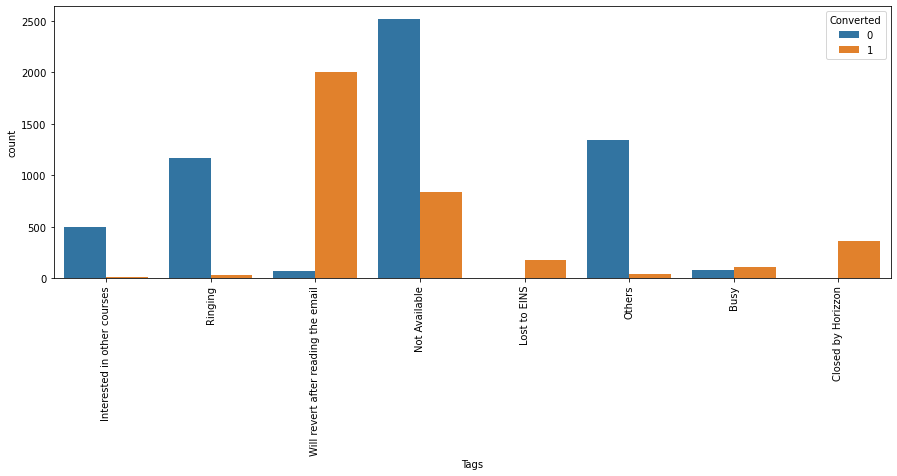

In [21]:
# Visualizing count of "Tags" Variable based on Target Variable ("Converted") after merging low frequency tags
cat_plot('Tags')

#### 3.1.2 Lead Profile Variable

In [22]:
# Analysis of "Lead Profile" variable having null values (29.32%).
# Checking value percentages of "Lead Profile" variable
round(lead['Lead Profile'].value_counts(dropna=False)/len(lead['Lead Profile'])*100,2)

Select                         44.87
NaN                            29.32
Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

### Inference: 
There is a Select value used in "Lead Profile" Variable having <b>44.87%</b> contribution. This Select value is nothing but a default value and can be treated as a null/missing value.

Considering the same and treating the Select as NaN/missing values, we will have <b>~74.19%</b> null/missing values in "Lead Profile".

Due to high percentage of missing value. We will drop the column "Lead Profile"

In [23]:
# Dropping "Lead Profile" variable
lead.drop(["Lead Profile"], axis=1, inplace=True)
lead.shape

(9240, 29)

#### 3.1.3 What matters most to you in choosing a course Variable

In [24]:
# Analysis of "What matters most to you in choosing a course" variable having null values (29.32%).
# Checking value percentages of "What matters most to you in choosing a course" variable
round(lead['What matters most to you in choosing a course'].value_counts(dropna=False)/len(lead['What matters most to you in choosing a course'])*100,2)

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [25]:
# Imputing/Replacing missing values with Mode(maximuum occurring value) "Better Career Prospects"
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

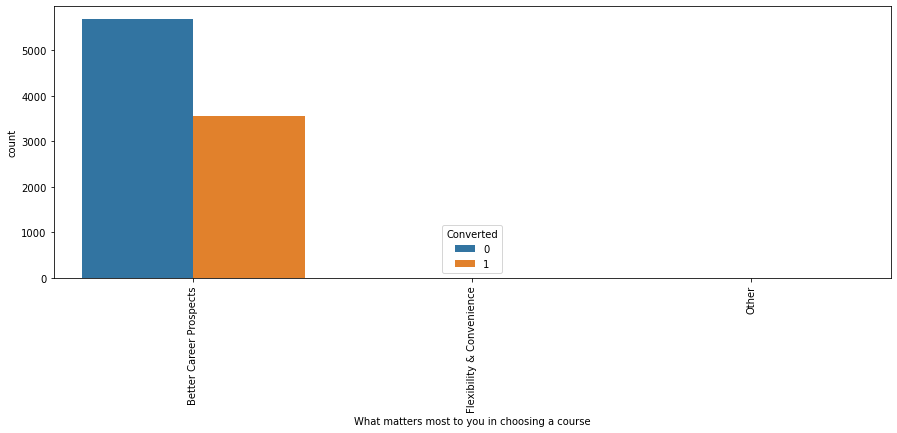

In [26]:
#Visualizing count of "What matters most to you in choosing a course" Variable based on Target Variable ("Converted")
cat_plot('What matters most to you in choosing a course')

In [27]:
round(lead['What matters most to you in choosing a course'].value_counts(dropna=False)/len(lead['What matters most to you in choosing a course'])*100,2)

Better Career Prospects      99.97
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

### Inference:
There is a huge data imbalance (99.97% values are Better Career Prospects) in "What matters most to you in choosing a course".

Due to high data imbalance. We will drop the column "What matters most to you in choosing a course"

In [28]:
# Dropping "What matters most to you in choosing a course" variable
lead.drop(["What matters most to you in choosing a course"], axis=1, inplace=True)
lead.shape

(9240, 28)

#### 3.1.4 What is your current occupation Variable

In [29]:
# Analysis of "What is your current occupation" variable having null values (29.11%).
# Checking value percentages of "What is your current occupation" variable
round(lead['What is your current occupation'].value_counts(dropna=False)/len(lead['What is your current occupation'])*100,2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [30]:
# Imputing/Replacing missing values with Mode(maximuum occurring value) "Unemployed"
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unemployed')

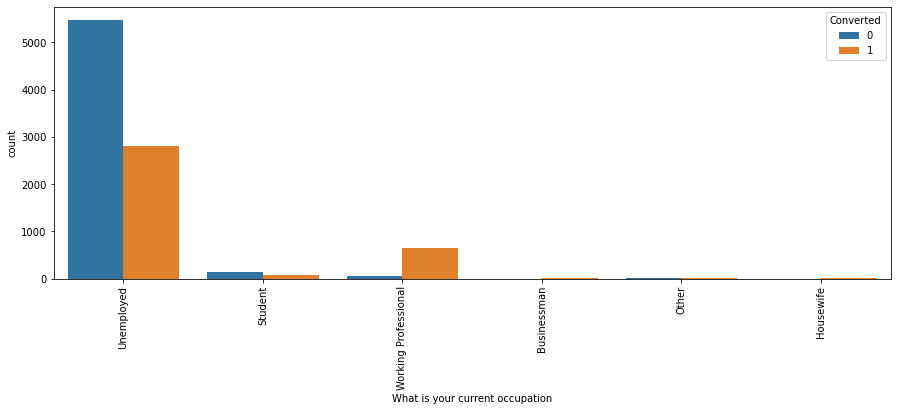

In [31]:
#Visualizing count of "What is your current occupation" Variable based on Target Variable ("Converted")
cat_plot('What is your current occupation')

### Inference:
Working Professionals have high chances of joining the course/suucessful leads or converion/success rate.

Unemployed have the maximum number of leads generated.

To improve on conversion/success rate, we can focus on Working Professional

#### 3.1.5 Country Variable

In [32]:
# Analysis of "Country" variable having null values (26.63%).
# Checking value percentages of "Country" variable
round(lead['Country'].value_counts(dropna=False)/len(lead['Country'])*100,2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

In [33]:
# Imputing/Replacing missing values with Mode(maximum occurring value) "India"
lead['Country'] = lead['Country'].replace(np.nan,'India')

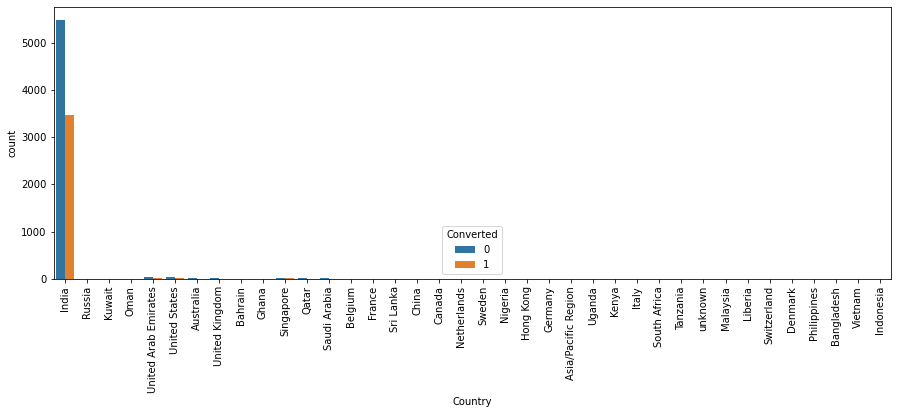

In [34]:
#Visualizing count of "Country" Variable based on Target Variable ("Converted")
cat_plot('Country')

### Inference:
There is a high data imbalance (96.89% values are India) in "Country".

Due to high data imbalance. We will drop the column "Country"

In [35]:
# Dropping "Country" variable
lead.drop(["Country"], axis=1, inplace=True)
lead.shape

(9240, 27)

#### 3.1.6 How did you hear about X Education Variable

In [36]:
# Analysis of "How did you hear about X Education" variable having null values (23.89%).
# Checking value percentages of "How did you hear about X Education" variable
round(lead['How did you hear about X Education'].value_counts(dropna=False)/len(lead['How did you hear about X Education'])*100,2)

Select                   54.58
NaN                      23.89
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other                     2.01
Multiple Sources          1.65
Advertisements            0.76
Social Media              0.73
Email                     0.28
SMS                       0.25
Name: How did you hear about X Education, dtype: float64

### Inference: 
There is a Select value used in "How did you hear about X Education" Variable having <b>54.58%</b> contribution. This Select value is nothing but a default value and can be treated as a null/missing value.

Considering the same and treating the Select as NaN/missing values, we will have <b>~78.47%</b> null/missing values in "How did you hear about X Education".

Due to high percentage of missing value. We will drop the column "How did you hear about X Education"

In [37]:
# Dropping "How did you hear about X Education" variable
lead.drop(["How did you hear about X Education"], axis=1, inplace=True)
lead.shape

(9240, 26)

#### 3.1.7 Specialization Variable

In [38]:
# Analysis of "Specialization" variable having null values (15.56%).
# Checking value percentages of "Specialization" variable
round(lead['Specialization'].value_counts(dropna=False)/len(lead['Specialization'])*100,2)

Select                               21.02
NaN                                  15.56
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

### Inference:
The variable have Select values. We will treat Select values same as NaN/missing values

In [39]:
# Replacing NaN values & Select values with "Not Available"
lead['Specialization'] = lead['Specialization'].replace(np.nan,'Not Available')
lead['Specialization'] = lead['Specialization'].replace(['Select','Not Available'], 'Not Available')

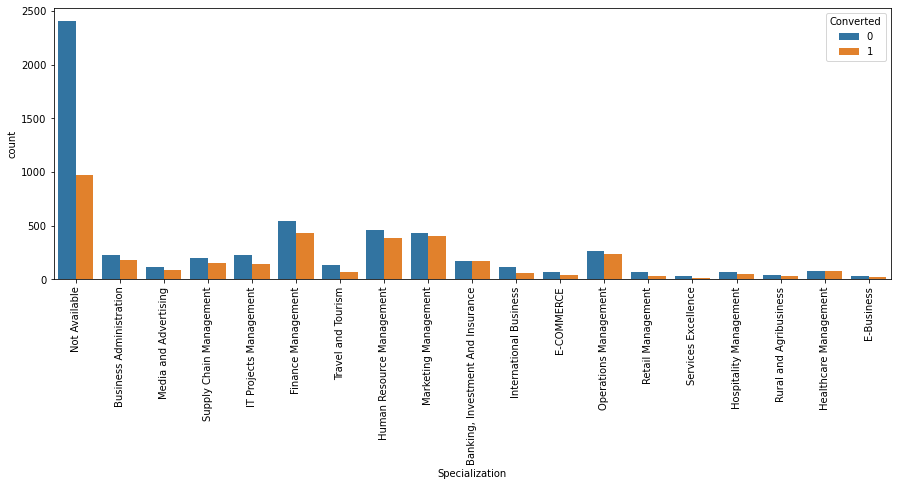

In [40]:
#Visualizing count of "Specialization" Variable based on Target Variable ("Converted")
cat_plot('Specialization')

### Inference:

There are many specializations with <b>Management</b> like Finance Management, IT Projects Management, Operations Management, etc. which aare having good amount of leads with very good conversion/success rate. Hence, it is critical for our analysis and we can integrate or merge all these specializations with Management under one umbrella/category  

In [41]:
# Merging various specializations with Management having similar behaviour under a new category "Management"
lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                         'Marketing Management','Operations Management',
                                                         'IT Projects Management','Supply Chain Management',
                                                         'Healthcare Management','Hospitality Management',
                                                         'Retail Management'], 'Management')

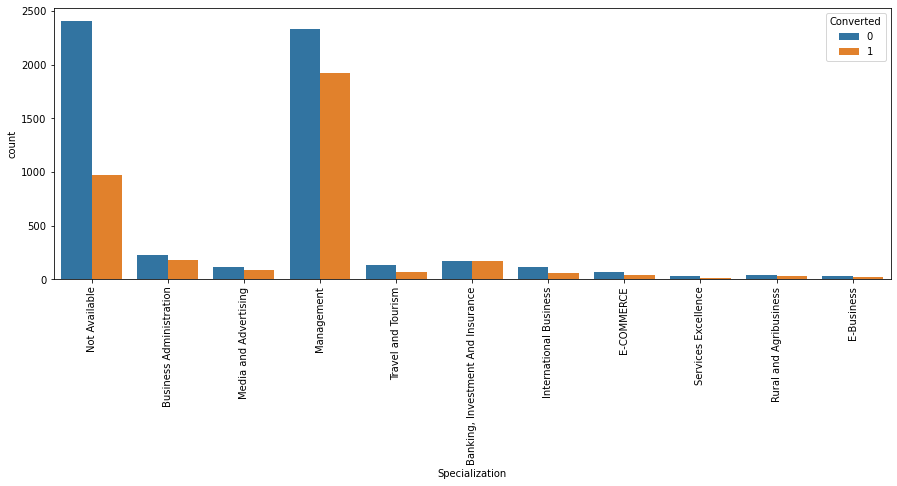

In [42]:
# Visualizing count of "Specialization" Variable based on Target Variable ("Converted") after merging
cat_plot('Specialization')

### Inference:
Management has the most number of leads with good conversion/success rate

#### 3.1.8 City Variable

In [43]:
# Analysis of "City" variable having null values (15.37%).
# Checking value percentages of "City" variable
round(lead['City'].value_counts(dropna=False)/len(lead['City'])*100,2)

Mumbai                         34.87
Select                         24.34
NaN                            15.37
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

### Inference:
The variable have Select values. We will treat Select values same as NaN/missing values

In [44]:
# Replacing NaN values & Select values with Mode(maximuum occurring value) "Mumbai"
lead['City'] = lead['City'].replace(np.nan,'Mumbai')
lead['City'] = lead['City'].replace(['Select','Mumbai'], 'Mumbai')

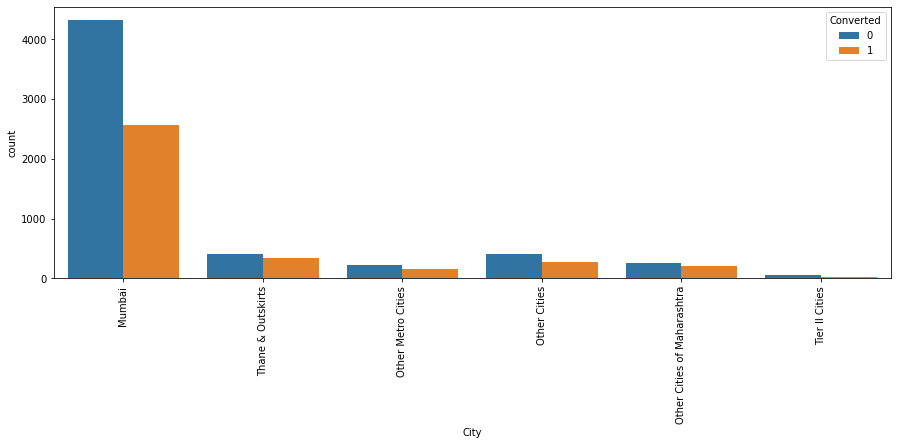

In [45]:
# Visualizing count of "City" Variable based on Target Variable
cat_plot('City')

### Inference:
Maximum Leads are getting generated from Mumbai City with good conversion/success rate

#### 3.1.9 Last Activity Variable

In [46]:
# Analysis of "Last Activity" variable having null values (1.11%).
# Checking value percentages of "Last Activity" variable
round(lead['Last Activity'].value_counts(dropna=False)/len(lead['Last Activity'])*100,2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
NaN                              1.11
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [47]:
# Replacing NaN values with "Others" as it is very low (1.11%)
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')

In [48]:
# Merging categories having low frequency/count with a new category "Others"
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                       'Approached upfront','View in browser link Clicked',
                                                       'Email Marked Spam','Email Received','Resubscribed to emails',
                                                       'Visited Booth in Tradeshow','Others'],'Others')

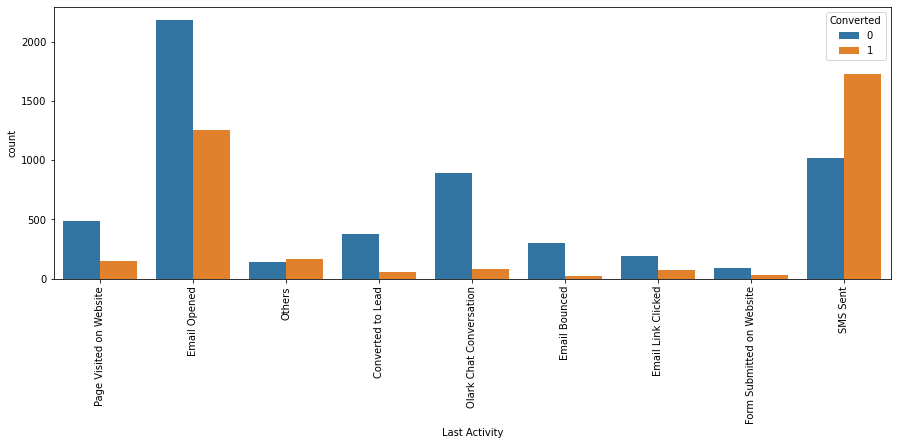

In [49]:
# Visualizing count of "Last Activity" Variable based on Target Variable ("Converted")
cat_plot('Last Activity')

### Inference:
Email Opened has maximum leads

SMS Sent has highest conversion/success rate

#### 3.1.10 Lead Source Variable

In [50]:
# Analysis of "Lead Source" variable having null values (0.39%).
# Checking value percentages of "Lead Source" variable
round(lead['Lead Source'].value_counts(dropna=False)/len(lead['Lead Source'])*100,2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
NaN                   0.39
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [51]:
# Replacing NaN values with "Others" as it is very low (0.39%)
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')

# Merging "google" values to "Google" to bring consistency
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')

# Merging "Facebook" values to "Social Media" to bring consistency
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')

In [52]:
# Merging categories having low frequency/count with a new category "Others"
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','youtubechannel',
                                                   'welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone',
                                                   'NC_EDM'] ,'Others')

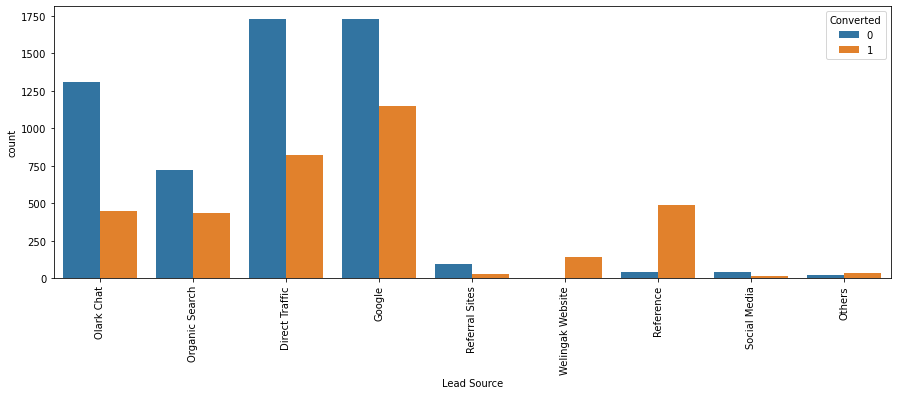

In [53]:
# Visualizing count of "Lead Source" Variable based on Target Variable ("Converted")
cat_plot('Lead Source')

### Inference:
High number of leads are generated by Google and Direct traffic with good conversion/success rate.

Conversion/success Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, we can focus on improving lead converion of olark chat, organic search, direct traffic, and google leads while generate more leads from reference and welingak website.

In [54]:
# Rechecking null values percentage in each column
round(lead.isnull().sum().sort_values(ascending=False)/lead.shape[0]*100,2)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Lead Origin                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Newspaper Article                           0.00
Lead Source                                 0.00
Magazine                                    0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity       

### Inference:
Only 2 variables have missing values and that is very less (1.48%).

Considering the low% of missing values in the data set, we can drop the rows having missing values.

In [55]:
# Dropping all rows which have missing values.
lead = lead.dropna()

In [56]:
# Rechecking null values percentage in each column
round(lead.isnull().sum().sort_values(ascending=False)/lead.shape[0]*100,2)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

### Inference:
All missing values treated or removed.

Let us continue analysis of remaining categorical variables

#### 3.1.11 Lead Origin Variable

In [57]:
# Analysis of "Lead Origin" variable.
# Checking value percentages of "Lead Origin" variable
round(lead['Lead Origin'].value_counts(dropna=False)/len(lead['Lead Origin'])*100,2)

Landing Page Submission    53.67
API                        39.31
Lead Add Form               6.68
Lead Import                 0.34
Name: Lead Origin, dtype: float64

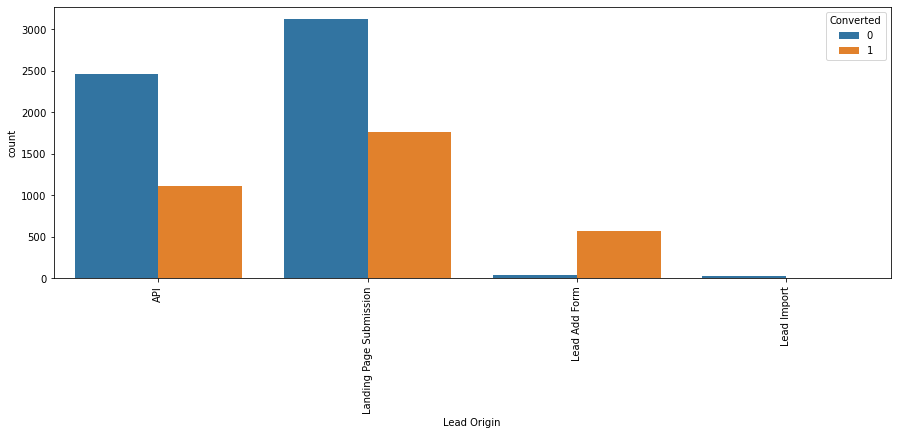

In [58]:
# Visualizing count of "Lead Origin" Variable based on Target Variable ("Converted")
cat_plot('Lead Origin')

### Inference:
High number of leads are observed in API and Landing Page Submission.

Lead Add Form has a very high conversion rate but count of leads are not very high.

Lead Import receive very few leads.

To improve overall lead conversion rate, we can focus on improving lead converion of API and Landing Page Submission while generating more leads from Lead Add Form.

#### 3.1.12 Get updates on DM Content Variable

In [59]:
# Analysis of "Get updates on DM Content" variable.
# Checking value percentages of "Get updates on DM Content" variable
round(lead['Get updates on DM Content'].value_counts(dropna=False)/len(lead['Get updates on DM Content'])*100,2)

No    100.0
Name: Get updates on DM Content, dtype: float64

### Inference:
All the responses (100%) to "Get updates on DM Content" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [60]:
# Dropping "Get updates on DM Content" variable
lead.drop(['Get updates on DM Content'], 1, inplace = True)
lead.shape

(9103, 25)

#### 3.1.13 Update me on Supply Chain Content Variable

In [61]:
# Analysis of "Update me on Supply Chain Content" variable.
# Checking value percentages of "Update me on Supply Chain Content" variable
round(lead['Update me on Supply Chain Content'].value_counts(dropna=False)/len(lead['Update me on Supply Chain Content'])*100,2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

### Inference:
All the responses (100%) to "Update me on Supply Chain Content" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [62]:
# Dropping "Update me on Supply Chain Content" variable
lead.drop(['Update me on Supply Chain Content'], 1, inplace = True)
lead.shape

(9103, 24)

#### 3.1.14 Through Recommendations Variable

In [63]:
# Analysis of "Through Recommendations" variable.
# Checking value percentages of "Through Recommendations" variable
round(lead['Through Recommendations'].value_counts(dropna=False)/len(lead['Through Recommendations'])*100,2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

### Inference:
Most of the responses (99.92%) to "Through Recommendations" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [64]:
# Dropping "Through Recommendations" variable
lead.drop(['Through Recommendations'], 1, inplace = True)
lead.shape

(9103, 23)

#### 3.1.15 I agree to pay the amount through cheque Variable

In [65]:
# Analysis of "I agree to pay the amount through cheque" variable.
# Checking value percentages of "I agree to pay the amount through cheque" variable
round(lead['I agree to pay the amount through cheque'].value_counts(dropna=False)/len(lead['I agree to pay the amount through cheque'])*100,2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

### Inference:
All the responses (100%) to "I agree to pay the amount through cheque" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [66]:
# Dropping "I agree to pay the amount through cheque" variable
lead.drop(['I agree to pay the amount through cheque'], 1, inplace = True)
lead.shape

(9103, 22)

#### 3.1.16 A free copy of Mastering The Interview Variable

In [67]:
# Analysis of "A free copy of Mastering The Interview" variable.
# Checking value percentages of "A free copy of Mastering The Interview" variable
round(lead['A free copy of Mastering The Interview'].value_counts(dropna=False)/len(lead['A free copy of Mastering The Interview'])*100,2)

No     68.27
Yes    31.73
Name: A free copy of Mastering The Interview, dtype: float64

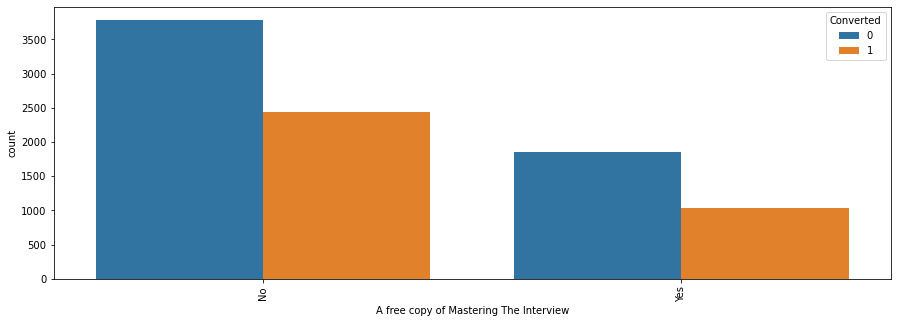

In [68]:
# Visualizing count of "A free copy of Mastering The Interview" Variable based on Target Variable ("Converted")
cat_plot('A free copy of Mastering The Interview')

### Inference:
Higher leads observed in area where customer is not looking for a free copy of "Mastering The Interview"

#### 3.1.17 Receive More Updates About Our Courses Variable

In [69]:
# Analysis of "Receive More Updates About Our Courses" variable.
# Checking value percentages of "Receive More Updates About Our Courses" variable
round(lead['Receive More Updates About Our Courses'].value_counts(dropna=False)/len(lead['Receive More Updates About Our Courses'])*100,2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

### Inference:
All the responses (100%) to "Receive More Updates About Our Courses" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [70]:
# Dropping "Receive More Updates About Our Courses" variable
lead.drop(['Receive More Updates About Our Courses'], 1, inplace = True)
lead.shape

(9103, 21)

#### 3.1.18 Magazine Variable

In [71]:
# Analysis of "Magazine" variable.
# Checking value percentages of "Magazine" variable
round(lead['Magazine'].value_counts(dropna=False)/len(lead['Magazine'])*100,2)

No    100.0
Name: Magazine, dtype: float64

### Inference:
All the responses (100%) to "Magazine" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [72]:
# Dropping "Magazine" variable
lead.drop(['Magazine'], 1, inplace = True)
lead.shape

(9103, 20)

#### 3.1.19 Digital Advertisement Variable

In [73]:
# Analysis of "Digital Advertisement" variable.
# Checking value percentages of "Digital Advertisement" variable
round(lead['Digital Advertisement'].value_counts(dropna=False)/len(lead['Digital Advertisement'])*100,2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

### Inference:
Most of the responses (99.96%) to "Digital Advertisement" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [74]:
# Dropping "Digital Advertisement" variable
lead.drop(['Digital Advertisement'], 1, inplace = True)
lead.shape

(9103, 19)

#### 3.1.20 Newspaper Variable

In [75]:
# Analysis of "Newspaper" variable.
# Checking value percentages of "Newspaper" variable
round(lead['Newspaper'].value_counts(dropna=False)/len(lead['Newspaper'])*100,2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

### Inference:
Most of the responses (99.99%) to "Newspaper" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [76]:
# Dropping "Newspaper" variable
lead.drop(['Newspaper'], 1, inplace = True)
lead.shape

(9103, 18)

#### 3.1.21 X Education Forums Variable

In [77]:
# Analysis of "X Education Forums" variable.
# Checking value percentages of "X Education Forums" variable
round(lead['X Education Forums'].value_counts(dropna=False)/len(lead['X Education Forums'])*100,2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

### Inference:
Most of the responses (99.99%) to "X Education Forums" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [78]:
# Dropping "X Education Forums" variable
lead.drop(['X Education Forums'], 1, inplace = True)
lead.shape

(9103, 17)

#### 3.1.22 Newspaper Article Variable

In [79]:
# Analysis of "Newspaper Article" variable.
# Checking value percentages of "Newspaper Article" variable
round(lead['Newspaper Article'].value_counts(dropna=False)/len(lead['Newspaper Article'])*100,2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

### Inference:
Most of the responses (99.98%) to "Newspaper Article" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [80]:
# Dropping "Newspaper Article" variable
lead.drop(['Newspaper Article'], 1, inplace = True)
lead.shape

(9103, 16)

#### 3.1.23 Search Variable

In [81]:
# Analysis of "Search" variable.
# Checking value percentages of "Search" variable
round(lead['Search'].value_counts(dropna=False)/len(lead['Search'])*100,2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

### Inference:
Most of the responses (99.85%) to "Search" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [82]:
# Dropping "Search" variable
lead.drop(['Search'], 1, inplace = True)
lead.shape

(9103, 15)

#### 3.1.24 Do Not Call Variable

In [83]:
# Analysis of "Do Not Call" variable.
# Checking value percentages of "Do Not Call" variable
round(lead['Do Not Call'].value_counts(dropna=False)/len(lead['Do Not Call'])*100,2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

### Inference:
Most of the responses (99.98%) to "Do Not Call" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [84]:
# Dropping "Do Not Call" variable
lead.drop(['Do Not Call'], 1, inplace = True)
lead.shape

(9103, 14)

#### 3.1.25 Do Not Email Variable

In [85]:
# Analysis of "Do Not Email" variable.
# Checking value percentages of "Do Not Email" variable
round(lead['Do Not Email'].value_counts(dropna=False)/len(lead['Do Not Email'])*100,2)

No     92.05
Yes     7.95
Name: Do Not Email, dtype: float64

### Inference:
Most of the responses (92.05%) to "Do Not Email" variable is No and has no impact on the analysis. Due to high imbalance in variable we will drop it.

In [86]:
# Dropping "Do Not Email" variable
lead.drop(['Do Not Email'], 1, inplace = True)
lead.shape

(9103, 13)

#### 3.1.26 Last Notable Activity Variable

In [87]:
# Analysis of "Last Notable Activity" variable.
# Checking value percentages of "Last Notable Activity" variable
round(lead['Last Notable Activity'].value_counts(dropna=False)/len(lead['Last Notable Activity'])*100,2)

Modified                        35.92
Email Opened                    31.06
SMS Sent                        23.86
Page Visited on Website          3.49
Olark Chat Conversation          2.01
Email Link Clicked               1.90
Email Bounced                    0.66
Unsubscribed                     0.52
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Approached upfront               0.01
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64

In [88]:
# Merging low frequency/count with a new category "Others"
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront','Form Submitted on Website',
                                                                       'Email Received'],'Others')

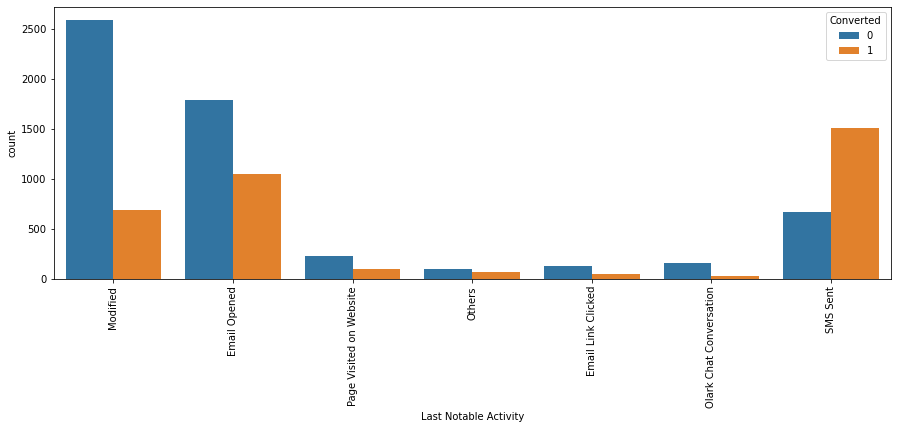

In [89]:
# Visualizing count of "Last Notable Activity" Variable based on Target Variable ("Converted") after merging
cat_plot('Last Notable Activity')

### Inference:
Most of the leads are in area where last notable activity was Modified & Email Opened

Conversion/success rate is high in SMS Sent activity

### 3.2 Numerical Attributes Analysis

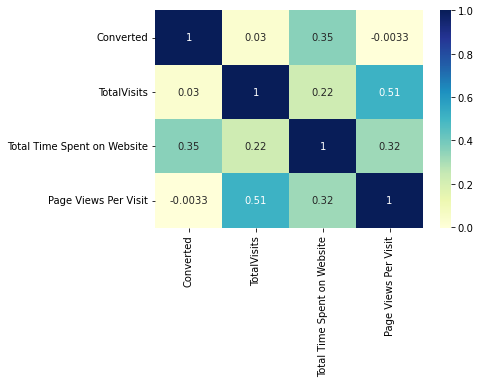

In [90]:
# Check Correlations of numeric variables using heat map
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Inference:
No strong correlation between Target Variable and other variables

Total Visits and Page Views Per Visit have a moderate correlation (0.51)

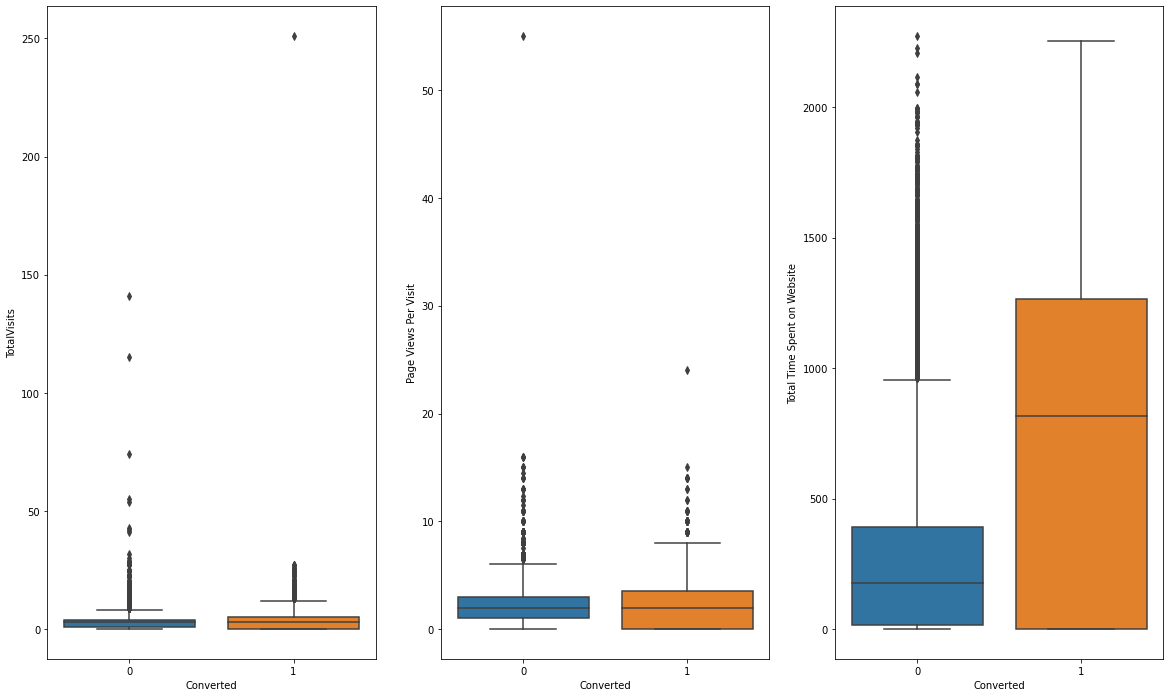

In [91]:
# Checking box plots of numerical variables against Target variable ("Converted")
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

### inference:
There are outliers in each of the 3 numerical variables. To be further analyzed individually

There is no real difference in Median values for converted and not converted leads for Page Views Per Visit

Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

#### 3.2.1 Total Visits Variable

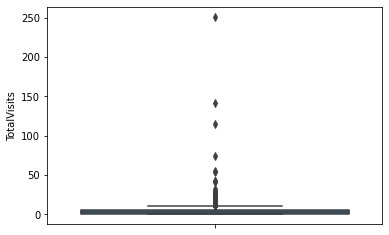

In [92]:
# Creating a boxplot for visualization
sns.boxplot(y=lead['TotalVisits'])
plt.show()

### Inference:
There are lot of outliers in Total Visits

In [93]:
# Evaluating Percentile values
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

### Inference:
99% of the data have values between 0 & 17.

As outlier treatment, We can remove top 1% and bottom 1% outlier values 

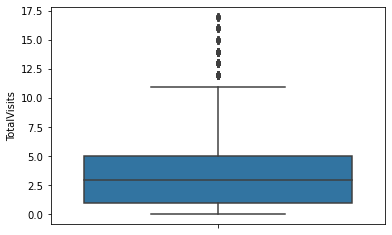

In [94]:
# Remove Top and Bottom 1% outlier values
Top = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Top)]
Bottom = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Bottom)]
sns.boxplot(y=lead['TotalVisits'])
plt.show()

In [95]:
lead.shape

(9020, 13)

### 3.2.2 Page Views Per Visit Variable

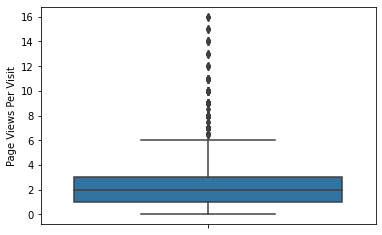

In [96]:
# Creating a boxplot for visualization
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

In [97]:
# Evaluating Percentile values
lead['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

### Inference:
99% of the data have values between 0 & 9.

As outlier treatment, We can remove top 1% and bottom 1% outlier values

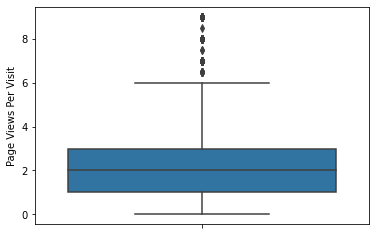

In [98]:
# Remove Top and Bottom 1% outlier values
Top = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[(lead['Page Views Per Visit'] <= Top)]
Bottom = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[(lead['Page Views Per Visit'] >= Bottom)]
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

In [99]:
lead.shape

(8953, 13)

### 3.2.3 Total Time Spent on Website Variable

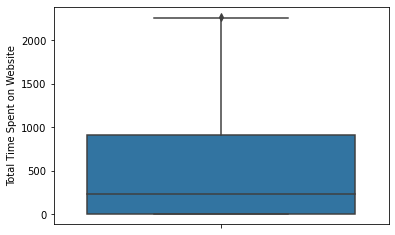

In [100]:
# Creating a boxplot for visualization
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.show()

### Inference:
No outliers in the data. No action required

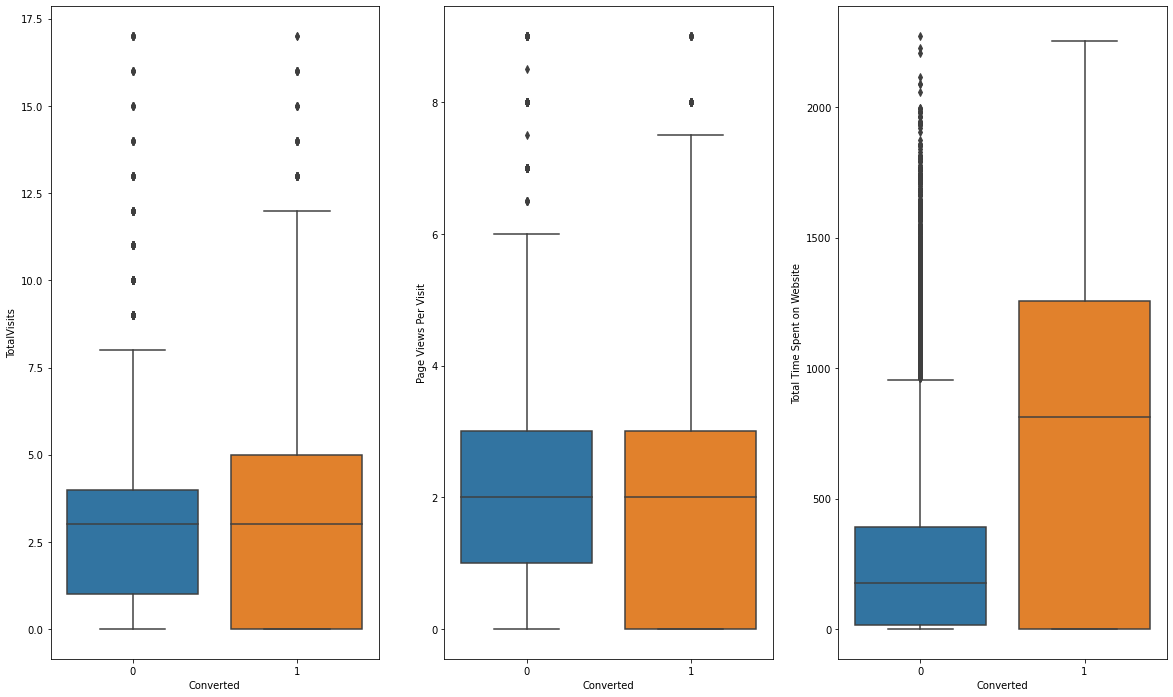

In [101]:
# Checking the spread of numerical varaibles against Target variable ("Converted") after outlier treatment
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

### Inference:
There is no real difference in Median values for converted and not converted leads for Total Visits & Page Views Per Visit

Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

### Step 4: Dummy Value Creation
We will be creating Dummy values for Categorical variables

In [102]:
# Checking the info of various variables
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Converted                               8953 non-null   int64  
 3   TotalVisits                             8953 non-null   float64
 4   Total Time Spent on Website             8953 non-null   int64  
 5   Page Views Per Visit                    8953 non-null   float64
 6   Last Activity                           8953 non-null   object 
 7   Specialization                          8953 non-null   object 
 8   What is your current occupation         8953 non-null   object 
 9   Tags                                    8953 non-null   object 
 10  City                                    8953 non-null   obje

In [103]:
# Fetching the list of Categorical Columns/variables
cat_var = lead.select_dtypes(include=['object']).columns
cat_var

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [104]:
# Mapping the "A free copy of Mastering The Interview" variable to binary 1 & 0 using lambda function.
lead['A free copy of Mastering The Interview']=lead['A free copy of Mastering The Interview'].apply(lambda x: 1 if x == 'Yes' else 0)

In [105]:
# Creating dummies for "Lead Origin","What is your current occupation","City" variables and dropping the first column
dummy_1 = pd.get_dummies(lead[['Lead Origin','What is your current occupation','City']], drop_first=True)

# Adding the dummy variables to main dataset(lead)
lead = pd.concat([lead,dummy_1],1)

In [106]:
# Creating dummies for "Lead Source" variable and dropping the Others column as it has no relevant data
dummy_2 = pd.get_dummies(lead['Lead Source'], prefix = 'Lead Source')
dummy_2=dummy_2.drop(['Lead Source_Others'],1)

# Adding the dummy variables to main dataset(lead)
lead = pd.concat([lead,dummy_2],1)

In [107]:
# Creating dummies for "Last Activity" variable and dropping the Others column as it has no relevant data
dummy_3 = pd.get_dummies(lead['Last Activity'], prefix = 'Last Activity')
dummy_3=dummy_3.drop(['Last Activity_Others'],1)

# Adding the dummy variables to main dataset(lead)
lead = pd.concat([lead,dummy_3],1)

In [108]:
# Creating dummies for "Specialization" variable and dropping the Not Available column as it has no relevant/missing data
dummy_4 = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')
dummy_4=dummy_4.drop(['Specialization_Not Available'],1)

# Adding the dummy variables to main dataset(lead)
lead = pd.concat([lead,dummy_4],1)

In [109]:
# Creating dummies for "Tags" variable and dropping the Not Available column as it has no relevant/missing data
dummy_5 = pd.get_dummies(lead['Tags'], prefix = 'Tags')
dummy_5 = dummy_5.drop(['Tags_Not Available'],1)

# Adding the dummy variables to main dataset(lead)
lead = pd.concat([lead,dummy_5],1)

In [110]:
# Creating dummies for "Last Notable Activity" variable and dropping the Others column as it has no relevant data
dummy_6 = pd.get_dummies(lead['Last Notable Activity'], prefix = 'Last Notable Activity')
dummy_6 = dummy_6.drop(['Last Notable Activity_Others'],1)

# Adding the dummy variables to main dataset(lead)
lead = pd.concat([lead,dummy_6],1)

In [111]:
# Dropping the original columns/variables after dummy variable creation
lead.drop(cat_var, 1, inplace = True)

In [112]:
# Checking the top 5 values for the data set
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### Step 5: Train - Test Split
Splitting the data into Train and Test data set

In [113]:
# importing required libraries
from sklearn.model_selection import train_test_split

In [114]:
# Creating Target variable/Dependent variable set, y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [115]:
# Creating Feature variable/Independent variable set, X
X = lead.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [116]:
# Splitting data into Train and Test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [117]:
# Checking the dimension of the train and test datasets
print('X_train', X_train.shape)
print('X_test',X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (6267, 55)
X_test (2686, 55)
y_train (6267,)
y_test (2686,)


### Inference:
1. Train dataset have 6267 rows and 55 columns
2. Test dataset have 2686 rows and 55 columns
3. The above shows the correct 70:30 data split between train and test dataset

In [118]:
# Checking the X_train information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

### Step 6: Feature Scaling for numeric variables Train & Test data set
Feature scaling is performed to ensure the value ranges in each of the feature are in a similar range.

In [119]:
# Importing the required libarary
from sklearn.preprocessing import StandardScaler

In [120]:
# We will be scaling the three numerical variables "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"
# Scaling Continuous variables
num_var = X_train.select_dtypes(include=['float64', 'int64']).columns
# Use Normalized Scaler
scaler = StandardScaler()
# Fit and transform train dataset only
X_train[num_var] = scaler.fit_transform(X_train[num_var])
# Checking values after scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [121]:
# Scaling Continuous variables test dataset
num_var = X_test.select_dtypes(include=['float64', 'int64']).columns
# Transform test dataset
X_test[num_var] = scaler.transform(X_test[num_var])
# Checking values after scaling
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.668862,-0.304384,0.135997,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
984,-0.030697,-0.538073,0.399961,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
8135,-0.380477,0.794688,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6915,0.319082,-0.614753,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2712,-0.030697,-0.412100,0.399961,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [122]:
# Checking stats after scaling
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6.267000e+03,6.267000e+03,6.267000e+03,6267.000000,6267.000000,6267.00000,6267.000000,6267.000000,6267.000000,6267.000000,...,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,1.989083e-16,-1.465062e-16,1.346369e-17,0.528961,0.069411,0.00351,0.000798,0.001436,0.021063,0.905697,...,0.017393,0.152066,0.127334,0.224031,0.018510,0.311792,0.359821,0.019946,0.030796,0.241583
std,1.000080e+00,1.000080e+00,1.000080e+00,0.499200,0.254172,0.05915,0.028237,0.037872,0.143605,0.292274,...,0.130740,0.359114,0.333373,0.416976,0.134796,0.463262,0.479986,0.139825,0.172779,0.428077
min,-1.080035e+00,-8.721766e-01,-1.183825e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.302559e-01,-8.703509e-01,-6.558959e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.069709e-02,-4.449628e-01,-1.279673e-01,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.190823e-01,8.001647e-01,3.999613e-01,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4.866215e+00,3.275814e+00,3.567533e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


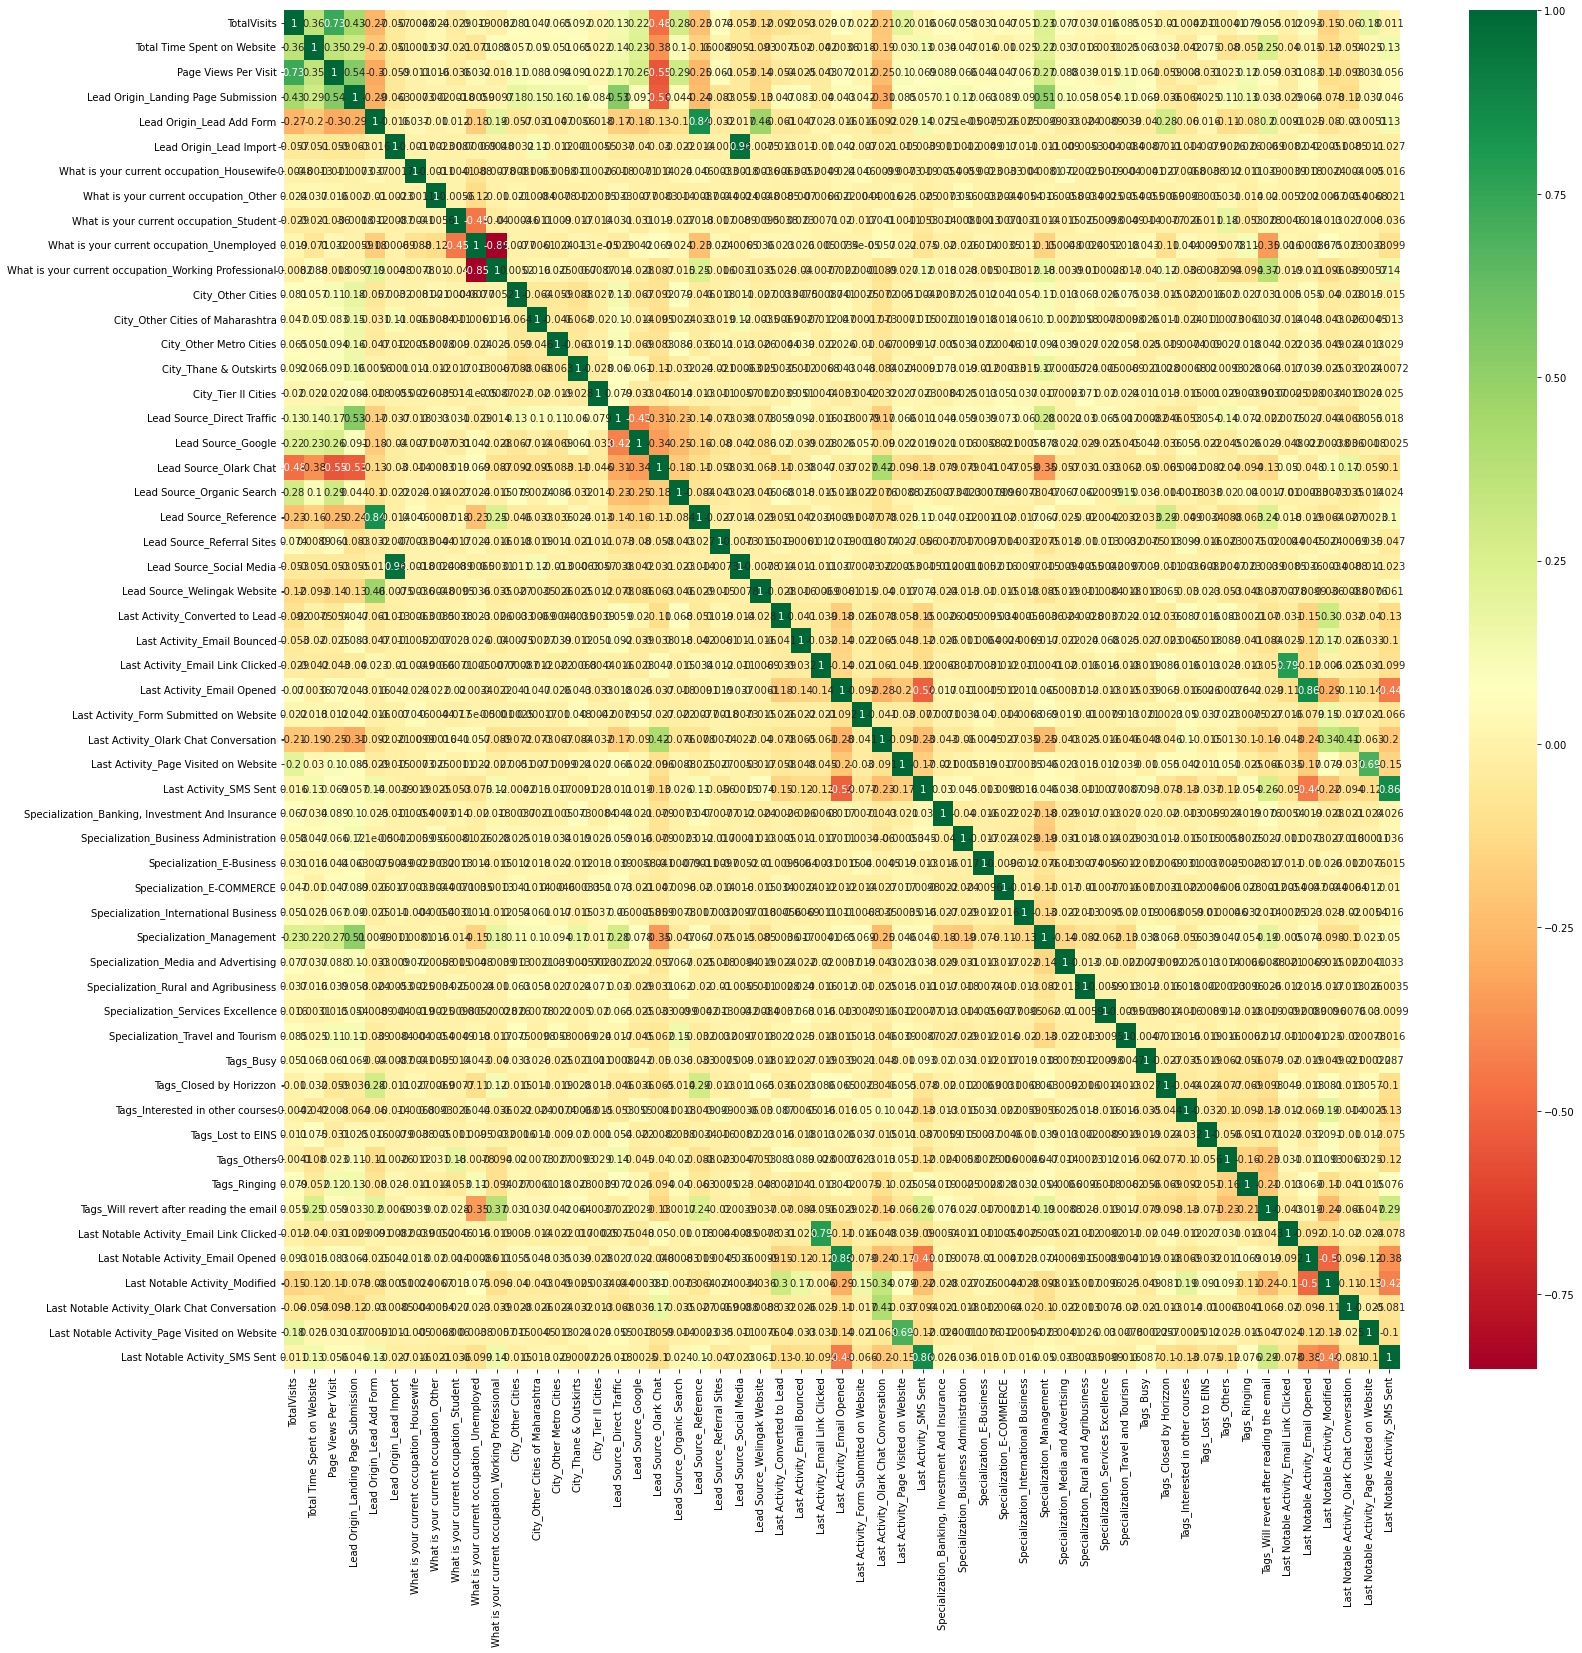

In [123]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
sns.heatmap(X_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

### Inference:
The number of attributes are very high and interpreting the correlations from above heat map manually is not very feasible

### Step 7: Model Building using Stats Model and RFE

### 7.1 Model Building using RFE

In [124]:
# Importing required libraries (RFE & LinearRegression)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [125]:
# Build a Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Running RFE with the output variables equal to 15 using automated approach
rfe = RFE(lr,n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [126]:
# Checking top 15 variables selected by RFE automated approach
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', False, 29),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Sou

In [127]:
# Creating a list of the variables selected by RFE
sel_var = X_train.columns[rfe.support_]
sel_var

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [128]:
# Checking the variables rejected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking,

### Inference:
RFE selected variables are 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent'

In [129]:
# dataframe with RFE selected variables
X_train_rfe = X_train[sel_var]

In [130]:
# Importing required libraries for VIF calculation 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
# Generic function to calculate VIF of variables
def calVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### 7.2 Model Building using Stats Model

#### 7.2.1: Model 1 - All variables selected by RFE

In [132]:
# Importing required libraries
import statsmodels.api as sm

In [133]:
# Building 1st logistic regression model
# Adding a constant to our X_train
X_train_lm1 = sm.add_constant(X_train_rfe)
# Create a 1st fitted model
lr1 = sm.GLM(y_train,X_train_lm1,family=sm.families.Binomial()).fit()
print(lr1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Mon, 23 Jan 2023   Deviance:                       2509.3
Time:                        13:02:17   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [134]:
# VIF Check
calVIF(X_train_rfe)

,Features,VIF
14,Last Notable Activity_SMS Sent,6.22
5,Last Activity_SMS Sent,6.13
1,Lead Origin_Lead Add Form,1.82
12,Last Notable Activity_Modified,1.69
11,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.39
4,Lead Source_Welingak Website,1.34
9,Tags_Others,1.26
0,Total Time Spent on Website,1.22
6,Tags_Closed by Horizzon,1.21


### Inference:
1. There are 2 features showing high VIF values
2. VIF for "Last Notable Activity_SMS Sent" feature (6.22) is greater than 5. We will be dropping it.

#### 7.2.2: Model 2 - After dropping Last Notable Activity_SMS Sent

In [135]:
# Dropping "Last Notable Activity_SMS Sent" Feature as it has high VIF value
X_train_new = X_train_rfe.drop(['Last Notable Activity_SMS Sent'], axis = 1)

In [136]:
# Building 2nd logistic regression model
# Add a constant to our X_train
X_train_lm2 = sm.add_constant(X_train_new)
# Create a 2nd fitted model
lr2 = sm.GLM(y_train,X_train_lm2,family=sm.families.Binomial()).fit()
print(lr2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.6
Date:                Mon, 23 Jan 2023   Deviance:                       2525.2
Time:                        13:02:18   Pearson chi2:                 8.52e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6038
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [137]:
# VIF Check
calVIF(X_train_new)

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
11,Tags_Will revert after reading the email,1.56
5,Last Activity_SMS Sent,1.46
12,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
4,Lead Source_Welingak Website,1.34
9,Tags_Others,1.25
0,Total Time Spent on Website,1.22
6,Tags_Closed by Horizzon,1.21
10,Tags_Ringing,1.16


### Inference:
1. There are no more high VIF values in any of the Feature
2. The p-value for "Lead Source_Referral Sites" Feature (0.256) is greter than 0.05. We will be dropping it.

#### 7.2.3: Model 3 - After dropping Lead Source_Referral Sites

In [138]:
# Dropping "Lead Source_Referral Sites" Feature as it has realtively high p-value and is insignificant
X_train_new = X_train_new.drop(['Lead Source_Referral Sites'], axis = 1)

In [139]:
# Building 3rd logistic regression model
# Add a constant to our X_train
X_train_lm3 = sm.add_constant(X_train_new)
# Create a 3rd fitted model
lr3 = sm.GLM(y_train,X_train_lm3,family=sm.families.Binomial()).fit()
print(lr3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Mon, 23 Jan 2023   Deviance:                       2526.6
Time:                        13:02:18   Pearson chi2:                 8.51e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6037
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [140]:
# VIF Check
calVIF(X_train_new)

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
10,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
11,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
8,Tags_Others,1.25
0,Total Time Spent on Website,1.22
5,Tags_Closed by Horizzon,1.21
9,Tags_Ringing,1.16


### 7.3 Final Model Interpretation

In [141]:
# Checking the parameters and their coefficient values
lr3.params

const                                           -1.117939
Total Time Spent on Website                      0.889556
Lead Origin_Lead Add Form                        1.662993
Lead Source_Direct Traffic                      -0.821189
Lead Source_Welingak Website                     3.884479
Last Activity_SMS Sent                           1.998134
Tags_Closed by Horizzon                          7.195456
Tags_Interested in other courses                -2.131806
Tags_Lost to EINS                                5.917665
Tags_Others                                     -2.373716
Tags_Ringing                                    -3.453095
Tags_Will revert after reading the email         4.506971
Last Notable Activity_Modified                  -1.652548
Last Notable Activity_Olark Chat Conversation   -1.802306
dtype: float64

### Inference:
1. From the lr3 model summary, it is evident that all our coefficients are not equal to zero for all 13 features
2. The VIF for all features/variables is now less than 5. This means there is very low multicollinearity between the features.
3. The p-values for all the features/variables is very low and hence are significant in the model.

### Step 8: Model Evaluation

In [142]:
# Getting the predicted values of target variable
y_train_pred = lr3.predict(X_train_lm3)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [143]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [144]:
# Creating a dataframe comprising of actual and predicted values of target variable
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})
# Adding an index with Prospect ID
y_train_pred_final['Prospect ID'] = y_train.index
# Checking the newly created dataframe
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [145]:
# Creating a new column/flag "Predicted" with values as 1 when "Converted_probability" > 0.5 else 0 
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)
# Checking the newly addded column
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


### Inference:
1. We have a final predicted dataframe having actual values of target variable, probability score and predicted values as per our model. We can now evaluate the model performance

In [146]:
# Import required libraries
from sklearn import metrics

In [147]:
#creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3693  189]
 [ 281 2104]]


In [148]:
# Predicted      Not Converted   Converted
# Actual
# Not converted        3693      189
# Converted            281       2104  

In [149]:
# Calculating the overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9250039891495133


### Inference:
Overall accuracy(92.50%) is very good.

In [150]:
# Assigning the true positives, true negatives, false positives and false negatives for evaluating other metrics
TN = confusion[0][0] #true negative  
FP = confusion[0][1] #false positive
TP = confusion[1][1] #true positive
FN = confusion[1][0] #false negative

In [151]:
# Calcualting sensitivity of our logistic regression model
Sensitivity = TP / float(TP+FN)
print(Sensitivity)

0.8821802935010482


In [152]:
# Calcualting specificity of our logistic regression model
Specificity = TN / float(TN+FP)
print(Specificity)

0.9513137557959814


In [153]:
# Calculating the False Positive Rate
FPR = (FP / float(TN+FP))
print(FPR)

0.04868624420401855


In [154]:
# Calculating Positive Predictive Value
PPV = (TP / float(TP+FP))
print(PPV)

0.9175752289576974


In [155]:
# Calculating Negative Predictive Value
NPV = (TN / float(TN+ FN))
print(NPV)

0.9292903875188727


### Inference:
The negative predictive value(NPV) and positive predictive value(PPV) are very close to each other.

### 8.1 Plotting ROC Curve
ROC Curve helps in demonstrating below things
1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [156]:
# Creating a function for plotting ROC Curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

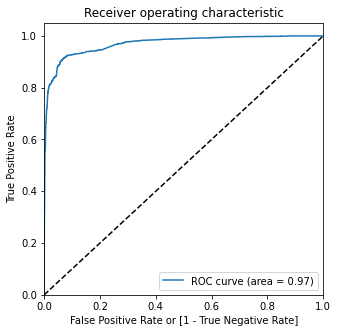

In [157]:
# Plotting the ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

### Inference:
The ROC curve is better if value is close to 1 (i.e., area of the curve). The ROC value is 0.97 indicative of a very good predictive model

### 8.2 Finding Optimal Cutoff
The threshold value of 0.5 has been taken as an arbitrary value in the ROC curve created earlier.

To identify the cutoff, we need to find a trade-off between sensitivity and specificity

In [158]:
# Creating columns with different probability cut offs
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [159]:
# Calculating accuracy, sensitivity and specificity for various probability cut-offs
# Creating a dataframe with columns of probability, accuracy, sensitivity and specificity
cutoff = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    conf_mat1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total = sum(sum(conf_mat1))
    accuracy = (conf_mat1[0,0] + conf_mat1[1,1]) / total # Calculating accuracy for various probabilities
    specificity = conf_mat1[0,0] / (conf_mat1[0,0] + conf_mat1[0,1]) # Calculating specificity for various probabilities
    sensitivity = conf_mat1[1,1] / (conf_mat1[1,0] + conf_mat1[1,1]) # Calculating sensitivity for various probabilities
    
    cutoff.loc[i] =[i,accuracy,sensitivity,specificity]
    
print(cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.380565     1.000000     0.000000
0.1          0.1  0.816180     0.971488     0.720762
0.2          0.2  0.901069     0.931237     0.882535
0.3          0.3  0.922930     0.916981     0.926584
0.4          0.4  0.925802     0.901468     0.940752
0.5          0.5  0.925004     0.882180     0.951314
0.6          0.6  0.915909     0.828092     0.969861
0.7          0.7  0.916228     0.810063     0.981453
0.8          0.8  0.906335     0.774843     0.987120
0.9          0.9  0.887027     0.718239     0.990726


### Inference:

Accuracy has its highest value at 0.4 cutoff. But values for all metrics are very close to each other at cut off values of 0.3, 0.4 & 0.5. To get even clear picture let us plot these metrices.

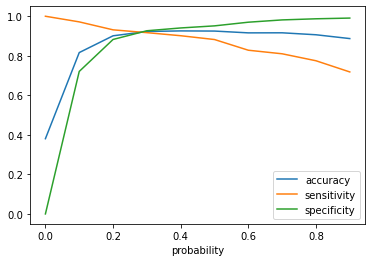

In [160]:
# Plotting accuracy, sensitivity and specificity for various probabilities
cutoff.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

### Inference:
The intersection point of accuracy, sensitivity and specificity is 0.3. 

Hence, The optimal cutoff probability is 0.3

### 8.3 Model Evaluation for Optimal Cutoff value

In [161]:
# Checking the prediction data set
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [162]:
# Adding a new column of Predicted_final based on optimal probability cutoff value of 0.3
y_train_pred_final['Predicted_final'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [163]:
# Creating a column of Lead Score to identify Hot Leads by using predicted probability
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_probability.map(lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_probability','Prospect ID','Predicted_final','Lead_Score']].head()

,Converted,Converted_probability,Prospect ID,Predicted_final,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [164]:
# Creating a new confusion matrix
conf_mat_new=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
conf_mat_new

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [165]:
# Checking overall accuracy with new threshold
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)

0.922929631402585

In [166]:
# Assigning the true positives, true negatives, false positives and false negatives for evaluating other metrics
TN = conf_mat_new[0][0] #true negative  
FP = conf_mat_new[0][1] #false positive
TP = conf_mat_new[1][1] #true positive
FN = conf_mat_new[1][0] #false negative

In [167]:
# Calcualting sensitivity of our logistic regression model
Sensitivity = TP / float(TP+FN)
print(Sensitivity)

0.9169811320754717


In [168]:
# Calcualting specificity of our logistic regression model
Specificity = TN / float(TN+FP)
print(Specificity)

0.9265842349304482


In [169]:
# Calculating the False Positive Rate
FPR = (FP / float(TN+FP))
print(FPR)

0.07341576506955177


In [170]:
# Calculating Positive Predictive Value
PPV = (TP / float(TP+FP))
print(PPV)

0.8847087378640777


In [171]:
# Calculating Negative Predictive Value
NPV = (TN / float(TN+ FN))
print(NPV)

0.9478260869565217


### Inference:
Model seems to be predicting well. Below are the various metric values at optimal cutoff of 0.3  for Train dataset
1. ROC: 0.97
2. Accuracy : 92.29%
3. Sensitivity : 91.70%
4. Specificity : 92.66%
5. False Positive Rate : 7.34%
6. Positive Predictive Value : 88.47%
7. Negative Predictive Value : 94.78%

### Step 9: Precision & Recall

In [172]:
# Viewing confusion matrix again
conf_mat_new

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [173]:
# Precision
Precision = TP / float(TP + FP)
print(Precision)

0.8847087378640777


In [174]:
# Recall
Recall = TP / float(TP + FN)
print(Recall)

0.9169811320754717


In [175]:
# Importing relevant libraries
from sklearn.metrics import precision_score, recall_score

In [176]:
# Precision
precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted_final)

0.8847087378640777

In [177]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)

0.9169811320754717

### Inference:
The Precision & Recall Score are within acceptable range for cutoff probability

### Precision and Recall Tradeoff

In [178]:
# Improting relevant libraries 
from sklearn.metrics import precision_recall_curve

In [179]:
# Evaluating precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

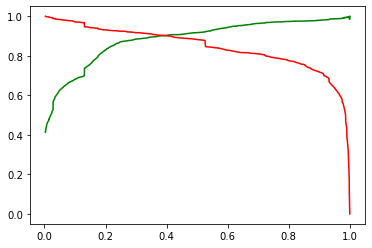

In [180]:
# Plotting the precision-recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 10: Predictions on Test Set

In [181]:
#Selecting the variables that were part of final model.
final_var=X_train_new.columns
X_test=X_test[final_var]
# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)

In [182]:
# Making predictions using the final model (lr3)
y_test_pred = lr3.predict(X_test_lm3)
y_test_pred[:10]

7681    0.024968
984     0.025965
8135    0.682639
6915    0.005953
2712    0.953578
244     0.002388
4698    0.014927
8287    0.028022
6791    0.981374
8970    0.005736
dtype: float64

In [183]:
# Reshaping it into an array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.02496848, 0.02596456, 0.68263873, 0.00595299, 0.95357793,
       0.0023884 , 0.01492692, 0.02802218, 0.98137413, 0.00573626])

In [184]:
# Creating a dataframe comprising of actual and predicted values of target variable
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_probability':y_test_pred})
# Adding an index with Prospect ID
y_test_pred_final['Prospect ID'] = y_test.index
# Checking the newly created dataframe
y_test_pred_final.head()

,Converted,Converted_probability,Prospect ID
0,0,0.024968,7681
1,0,0.025965,984
2,0,0.682639,8135
3,0,0.005953,6915
4,1,0.953578,2712


In [185]:
# Rearranging the columns of y_test_pred_final and adding Lead Score
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_probability']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_probability.map( lambda x: round(x*100))

In [186]:
# Checking the head of y_test_pred_final
y_test_pred_final.head()

,Prospect ID,Converted,Converted_probability,Lead_Score
0,7681,0,0.024968,2
1,984,0,0.025965,3
2,8135,0,0.682639,68
3,6915,0,0.005953,1
4,2712,1,0.953578,95


In [187]:
# Adding a new column of Predicted_final based on optimal probability cutoff value of 0.3
y_test_pred_final['Predicted_final'] = y_test_pred_final.Converted_probability.map( lambda x: 1 if x > 0.3 else 0)
y_test_pred_final.head()

,Prospect ID,Converted,Converted_probability,Lead_Score,Predicted_final
0,7681,0,0.024968,2,0
1,984,0,0.025965,3,0
2,8135,0,0.682639,68,1
3,6915,0,0.005953,1,0
4,2712,1,0.953578,95,1


In [188]:
# Creating a new confusion matrix
conf_mat_final=metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted_final)
conf_mat_final

array([[1564,  112],
       [  84,  926]], dtype=int64)

In [189]:
# Checking overall accuracy
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted_final)

0.9270290394638868

In [190]:
# Assigning the true positives, true negatives, false positives and false negatives for evaluating other metrics
TN = conf_mat_final[0][0] #true negative  
FP = conf_mat_final[0][1] #false positive
TP = conf_mat_final[1][1] #true positive
FN = conf_mat_final[1][0] #false negative

In [191]:
# Calcualting sensitivity
Sensitivity = TP / float(TP+FN)
print(Sensitivity)

0.9168316831683169


In [192]:
# Calcualting specificity
Specificity = TN / float(TN+FP)
print(Specificity)

0.9331742243436754


In [193]:
# Calculating the False Positive Rate
FPR = (FP / float(TN+FP))
print(FPR)

0.06682577565632458


In [194]:
# Calculating Positive Predictive Value
PPV = (TP / float(TP+FP))
print(PPV)

0.8921001926782274


In [195]:
# Calculating Negative Predictive Value
NPV = (TN / float(TN+ FN))
print(NPV)

0.9490291262135923


In [196]:
# Precision
precision_score(y_test_pred_final.Converted , y_test_pred_final.Predicted_final)

0.8921001926782274

In [197]:
# Recall
recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted_final)

0.9168316831683169

### Inference:
Model seems to be performing well. Below are the various metric values at optimal cutoff of 0.3 for Test dataset

1. Accuracy : 92.70%
2. Sensitivity : 91.68%
3. Specificity : 93.32%
4. False Positive Rate : 6.68%
5. Positive Predictive Value : 89.21%
6. Negative Predictive Value : 94.90%

### Final Observation 

Let us compare the values obtained for Train & Test:

Train Data:
1. Accuracy : 92.29%
2. Sensitivity : 91.70%
3. Specificity : 92.66%
4. Precision : 88.47%
5. Recall : 91.70%

Test Data:
1. Accuracy : 92.70%
2. Sensitivity : 91.68%
3. Specificity : 93.32%
4. Precision : 89.21%
5. Recall : 91.68%

The Model seems to predict the Conversion/Success Rate very well and we should be able to give the CEO confidence in making good calls based on this model